
Q1.




In [8]:

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [5]:


iris = datasets.load_iris()


import pandas as pd


# Convert to DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target (species) to the DataFrame
iris_df['species'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Check for null values in the DataFrame
null_values = iris_df.isnull().sum()

# Display the result
print(null_values)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.drop(columns='species'), iris_df['species'], test_size=0.2, random_state=42)

# Create the logistic regression model with the one-vs-rest (ovr) strategy
log_reg = LogisticRegression(multi_class='ovr', max_iter=200)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 96.67%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


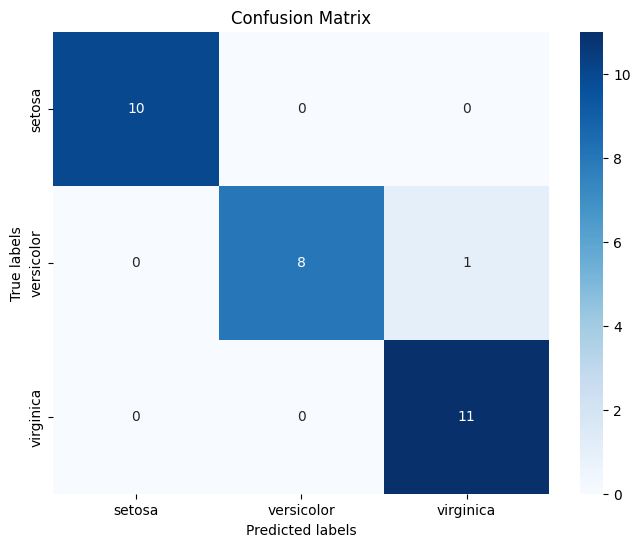

In [10]:
# Import the confusion matrix function
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Q2.


In [23]:
wedf=pd.read_csv('weather.csv')


wedf.head()

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,1
1,overcast,cool,normal,True,1
2,overcast,mild,high,True,1
3,overcast,hot,normal,False,1
4,rainy,mild,high,False,1


In [24]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(wedf, columns=['outlook', 'temperature', 'humidity']).astype(int)


df_encoded.head()


,windy,play,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal
0,0,1,1,0,0,0,1,0,1,0
1,1,1,1,0,0,1,0,0,0,1
2,1,1,1,0,0,0,0,1,1,0
3,0,1,1,0,0,0,1,0,0,1
4,0,1,0,1,0,0,0,1,1,0


In [27]:
y=df_encoded['play']
x=df_encoded.drop(columns='play',axis=1)


x.head()

,windy,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal
0,0,1,0,0,0,1,0,1,0
1,1,1,0,0,1,0,0,0,1
2,1,1,0,0,0,0,1,1,0
3,0,1,0,0,0,1,0,0,1
4,0,0,1,0,0,0,1,1,0


In [28]:
y.head()

,play
0,1
1,1
2,1
3,1
4,1


In [29]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
train_data, test_data, train_output,test_output = train_test_split(x,y, test_size=0.2, random_state=42)


from sklearn.tree import DecisionTreeClassifier


treemodel=DecisionTreeClassifier()


treemodels=DecisionTreeClassifier(criterion="entropy")


treemodels.fit(train_data,train_output)

DecisionTreeClassifier(criterion='entropy')

In [30]:
treemodel.fit(train_data,train_output)

DecisionTreeClassifier()

[Text(0.4, 0.9, 'x[0] <= 0.5\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.30000000000000004, 0.8, 'True  '),
 Text(0.6, 0.7, 'x[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5, 0.8, '  False'),
 Text(0.4, 0.5, 'x[8] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.3, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

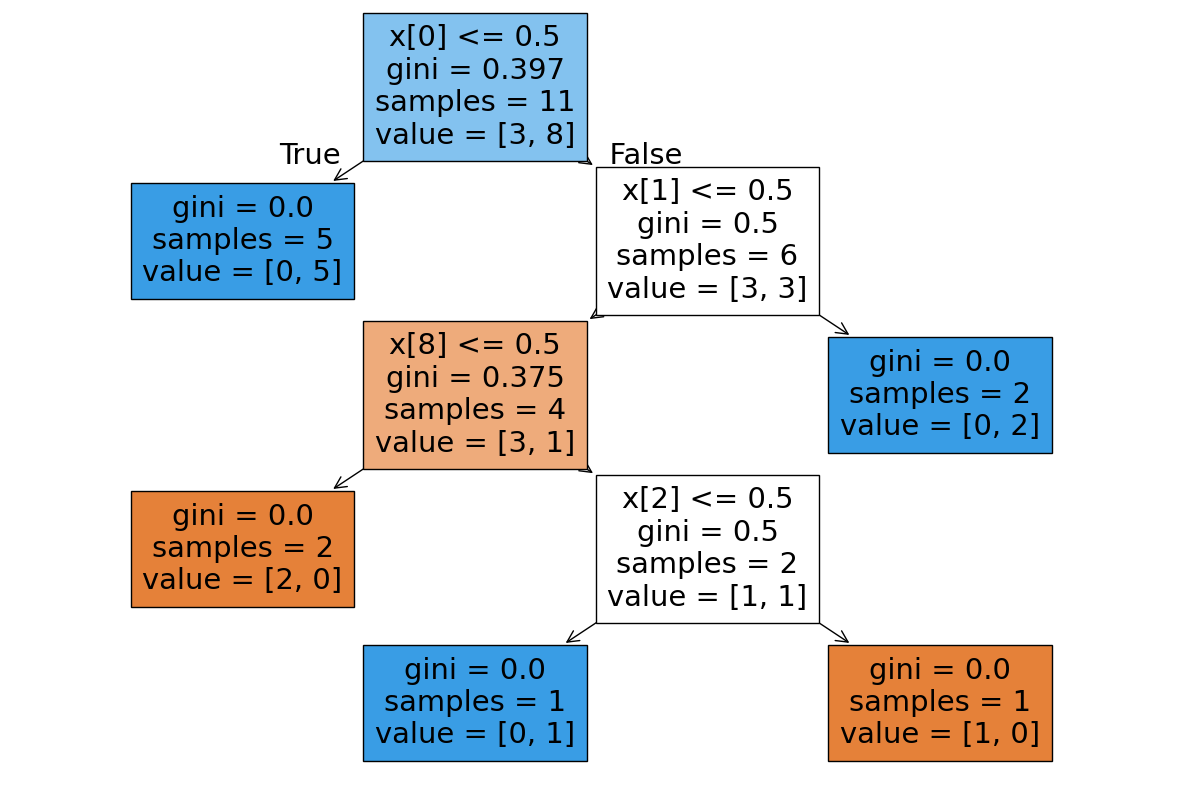

In [31]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

[Text(0.4, 0.875, 'x[0] <= 0.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[5] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]')]

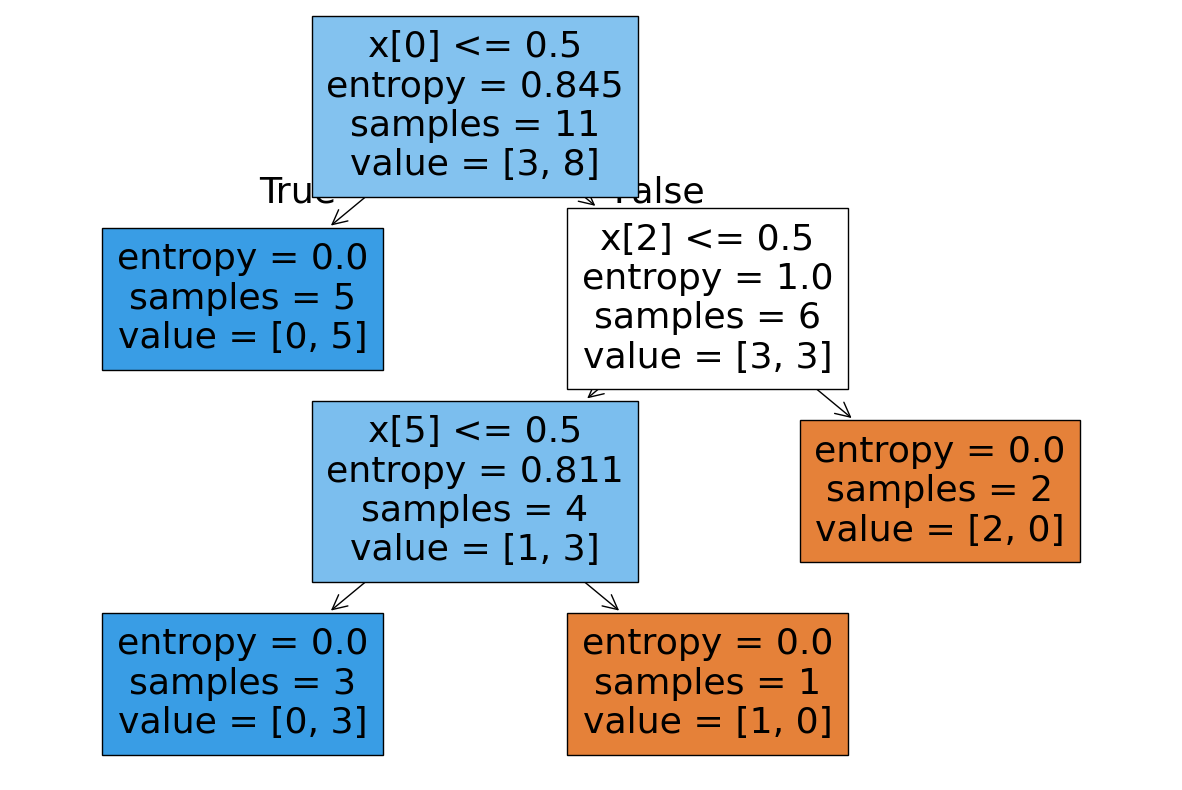

In [32]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodels,filled=True)

In [33]:
pred=treemodel.predict(test_data)
accuracy = accuracy_score(test_output,pred)
print("Accuracy:", accuracy)


Accuracy: 0.3333333333333333


In [38]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [39]:
# with entropy

model_entropy=DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_entropy.fit(x_train,y_train)

y_pred_entropy=model_entropy.predict(x_test)
y_pred_entropy


print("Confusion Matrix: ", confusion_matrix(y_test,y_pred_entropy))
print("Accuracy: ", accuracy_score(y_test,y_pred_entropy)*100)
print("Report: ", classification_report(y_test,y_pred_entropy))

# plt.figure(figsize=(15, 10))
# feature_names= ['outlook','temp','humidity','windy']
# class_names=['P','NP']
# plot_tree(y_pred_entropy, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
# plt.show()



Confusion Matrix:  [[0 1]
 [3 1]]
Accuracy:  20.0
Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.25      0.33         4

    accuracy                           0.20         5
   macro avg       0.25      0.12      0.17         5
weighted avg       0.40      0.20      0.27         5



Q3.

In [40]:
data = pd.read_csv('BankNote_Authentication.csv')
X = data.drop(columns='class')
y = data['class']


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [43]:

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9805825242718447
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       229
           1       0.99      0.97      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412

